# **Classification binaire en Data Mining (Campagne marketing bancaire)**

In [ ]:
# ==========================
# IMPORTATION DES LIBRAIRIES
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ======================
# CHARGEMENT DES DONNÉES
# ======================
df = pd.read_csv('bank_marketing_tp4.csv.csv', sep=';')
print("Dataset shape:", df.shape)
print("\nPremières lignes:")
df.head()

Dataset shape: (4119, 21)

Premières lignes:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# **Proportion globale de "yes" et "no"**

In [ ]:
prop = df['y'].value_counts(normalize=True) * 100
print("Proportion globale :")
print(prop)

Proportion globale :
y
no     89.05074
yes    10.94926
Name: proportion, dtype: float64


# **Cartographie du dataset**
# *Type et rôle des colonnes*

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        typ = 'Numérique'
    else:
        typ = 'Catégoriel'
    if col == 'y':
        role = 'Cible'
    else:
        role = 'Feature'
    print(f"{col}: {typ} - {role}")

age: Numérique - Feature
job: Catégoriel - Feature
marital: Catégoriel - Feature
education: Catégoriel - Feature
default: Catégoriel - Feature
housing: Catégoriel - Feature
loan: Catégoriel - Feature
contact: Catégoriel - Feature
month: Catégoriel - Feature
day_of_week: Catégoriel - Feature
duration: Numérique - Feature
campaign: Numérique - Feature
pdays: Numérique - Feature
previous: Numérique - Feature
poutcome: Catégoriel - Feature
emp.var.rate: Numérique - Feature
cons.price.idx: Numérique - Feature
cons.conf.idx: Numérique - Feature
euribor3m: Numérique - Feature
nr.employed: Numérique - Feature
y: Catégoriel - Cible


# **Valeurs manquantes**

In [ ]:
na = df.isna().sum()
na_percent = (na / len(df)) * 100
na_table = pd.DataFrame({'NA_count': na, 'NA_%': na_percent})
print("Valeurs manquantes par colonne:")
print(na_table[na_table['NA_count'] > 0])

Valeurs manquantes par colonne:
Empty DataFrame
Columns: [NA_count, NA_%]
Index: []


# **Doublons**

In [ ]:
# Vérifier les doublons complets
duplicates = df.duplicated().sum()
print(f"Nombre de doublons complets : {duplicates}")

# Vérifier les doublons sur les features (sans la cible)
features = df.drop('y', axis=1)
duplicates_features = features.duplicated().sum()
print(f"Doublons sur les features seulement : {duplicates_features}")

Nombre de doublons complets : 0
Doublons sur les features seulement : 0


# **Table de fréquence**

In [ ]:
freq = df['y'].value_counts()
percent = df['y'].value_counts(normalize=True) * 100
freq_table = pd.DataFrame({'Effectif': freq, '%': percent})
print("Répartition de la cible :")
print(freq_table)

Répartition de la cible :
     Effectif         %
y                      
no       3668  89.05074
yes       451  10.94926


# **Diagramme en barres**

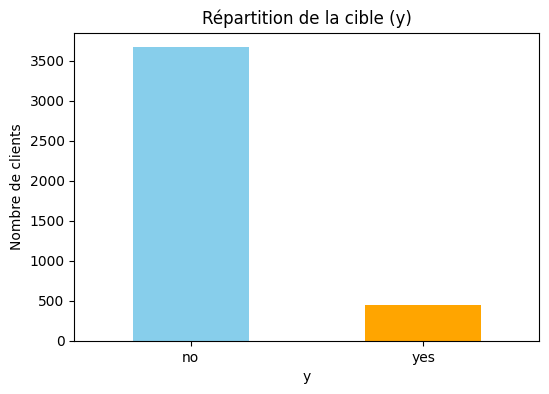

In [ ]:
plt.figure(figsize=(6,4))
df['y'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Répartition de la cible (y)')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=0)
plt.show()

# **Analyse univariée**

=== Variable duration ===
count    4119.000000
mean      256.788055
std       254.703736
min         0.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64


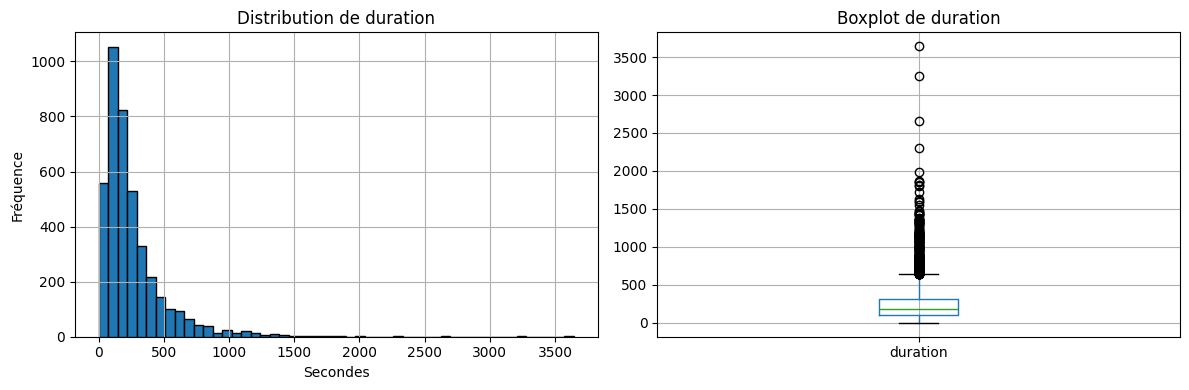


=== Variable job ===
Fréquences :
job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


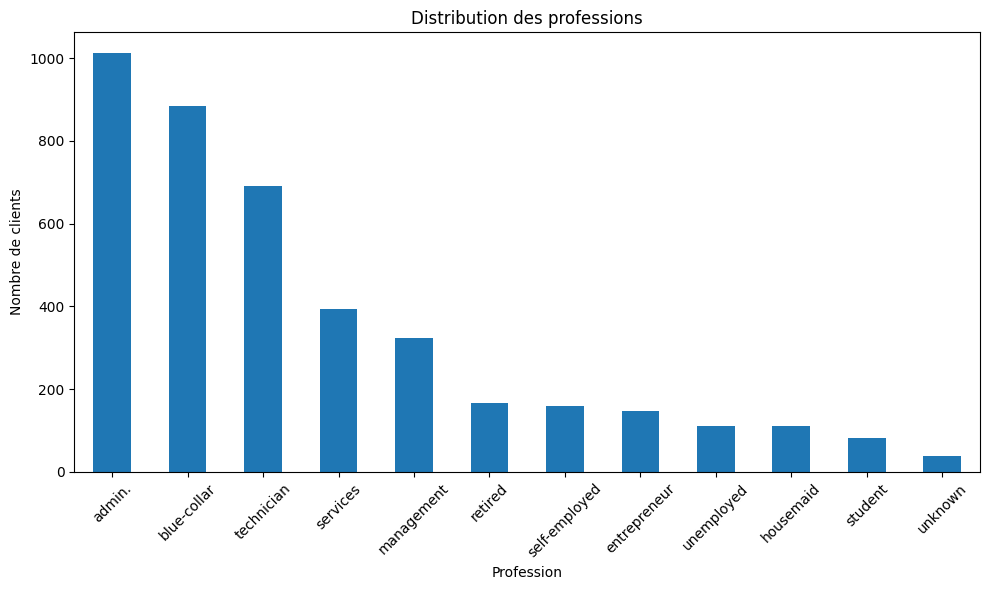

In [ ]:
# 1. duration (numérique)
print("=== Variable duration ===")
print(df['duration'].describe())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['duration'].hist(bins=50, edgecolor='black')
plt.title('Distribution de duration')
plt.xlabel('Secondes')
plt.ylabel('Fréquence')

plt.subplot(1,2,2)
df.boxplot(column='duration')
plt.title('Boxplot de duration')
plt.tight_layout()
plt.show()

# 2. job (catégorielle)
print("\n=== Variable job ===")
print("Fréquences :")
print(df['job'].value_counts())

plt.figure(figsize=(10,6))
df['job'].value_counts().plot(kind='bar')
plt.title('Distribution des professions')
plt.xlabel('Profession')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Lien avec la cible**

Moyenne de duration par classe :
y
no     219.40976
yes    560.78714
Name: duration, dtype: float64


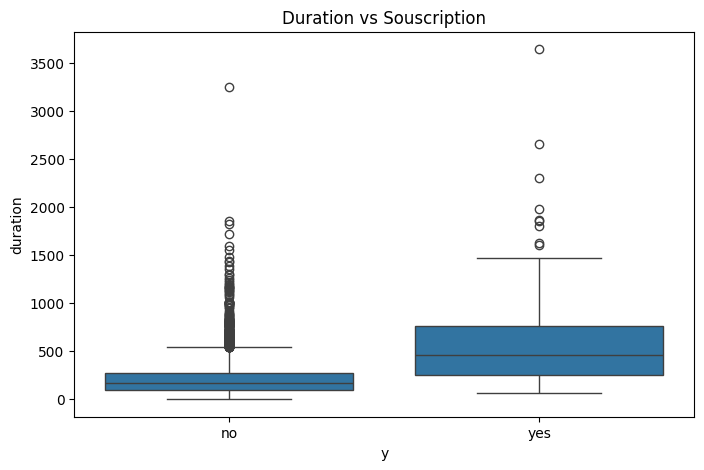


Moyenne de euribor3m par classe :
y
no     3.802826
yes    2.145448
Name: euribor3m, dtype: float64

=== poutcome vs y ===
y                   no        yes
poutcome                         
failure      85.242291  14.757709
nonexistent  91.711609   8.288391
success      35.211268  64.788732


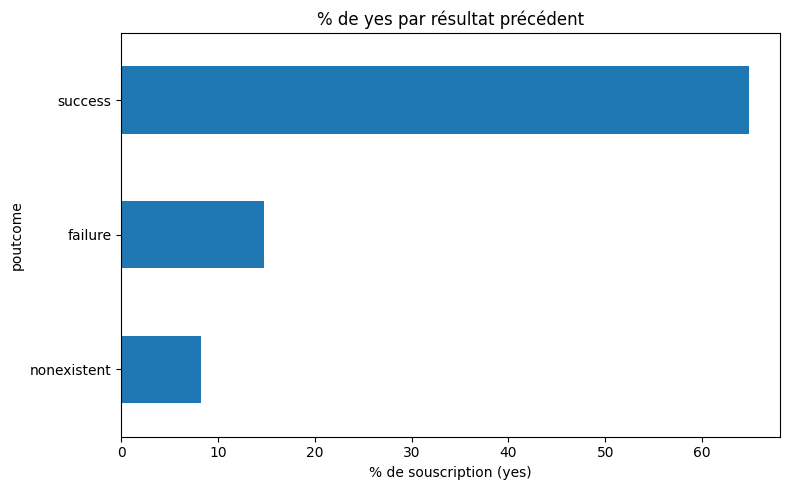

In [ ]:
# 1. duration vs y (numérique)
print("Moyenne de duration par classe :")
print(df.groupby('y')['duration'].mean())

plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duration vs Souscription')
plt.show()

# 2. euribor3m vs y (numérique)
print("\nMoyenne de euribor3m par classe :")
print(df.groupby('y')['euribor3m'].mean())

# 3. poutcome vs y (catégorielle)
print("\n=== poutcome vs y ===")
poutcome_cross = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
print(poutcome_cross)

plt.figure(figsize=(8,5))
poutcome_cross['yes'].sort_values().plot(kind='barh')
plt.title('% de yes par résultat précédent')
plt.xlabel('% de souscription (yes)')
plt.tight_layout()
plt.show()

# **Séparation train / test**
# **Split stratifié**

In [ ]:
# Encodage numérique de la cible
df['y_encoded'] = df['y'].map({'no': 0, 'yes': 1})

X = df.drop(['y', 'y_encoded'], axis=1)
y = df['y_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# **Tailles**

In [ ]:
print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (2883, 20)
Test size: (1236, 20)


# **Proportion de yes/no**

In [ ]:
print("Train - % yes:", y_train.mean() * 100)
print("Test - % yes:", y_test.mean() * 100)

Train - % yes: 10.96080471730836
Test - % yes: 10.922330097087379


# **Traitement des valeurs manquantes/spéciales**

In [ ]:
# Copie pour éviter les warnings
X_train_prep = X_train.copy()
X_test_prep = X_test.copy()

# Remplacer "unknown" par "missing"
categorical_cols = X_train_prep.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X_train_prep[col] = X_train_prep[col].replace('unknown', 'missing')
    X_test_prep[col] = X_test_prep[col].replace('unknown', 'missing')

# Créer une variable binaire "contacted_before" à partir de pdays
X_train_prep['contacted_before'] = (X_train_prep['pdays'] != 999).astype(int)
X_test_prep['contacted_before'] = (X_test_prep['pdays'] != 999).astype(int)


# **Suppression de colonnes**

In [ ]:
X_train_prep = X_train_prep.drop('day_of_week', axis=1)
X_test_prep = X_test_prep.drop('day_of_week', axis=1)

# **Encodage catégoriel**

In [ ]:
# Identifier les colonnes catégorielles restantes
cat_cols = X_train_prep.select_dtypes(include=['object']).columns

# OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train_prep[cat_cols])
X_test_encoded = encoder.transform(X_test_prep[cat_cols])

# Noms des colonnes
cat_feature_names = encoder.get_feature_names_out(cat_cols)

# DataFrames encodés
X_train_encoded_df = pd.DataFrame(X_train_encoded,
                                   columns=cat_feature_names,
                                   index=X_train_prep.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded,
                                  columns=cat_feature_names,
                                  index=X_test_prep.index)

# Concaténer avec les numériques
num_cols = X_train_prep.select_dtypes(exclude=['object']).columns
X_train_final = pd.concat([X_train_prep[num_cols], X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_prep[num_cols], X_test_encoded_df], axis=1)

# **Scaling numérique**

In [ ]:
scaler = StandardScaler()
X_train_final[num_cols] = scaler.fit_transform(X_train_final[num_cols])
X_test_final[num_cols] = scaler.transform(X_test_final[num_cols])

# **Vérification finale**

In [ ]:
print("Vérification finale:")
print(f"NaN dans train: {X_train_final.isna().sum().sum()}")
print(f"NaN dans test: {X_test_final.isna().sum().sum()}")
print(f"Types dans train: {set(X_train_final.dtypes)}")
print(f"Dimensions finales - Train: {X_train_final.shape}, Test: {X_test_final.shape}")

Vérification finale:
NaN dans train: 0
NaN dans test: 0
Types dans train: {dtype('float64')}
Dimensions finales - Train: (2883, 49), Test: (1236, 49)


# **Implémentation**

In [ ]:
# Baseline: toujours prédire la classe majoritaire (0 = "no")
majority_class = 0
y_pred_baseline = np.full_like(y_test, majority_class)

# **Métriques sur test set**

In [ ]:
recall_base = recall_score(y_test, y_pred_baseline)
f1_base = f1_score(y_test, y_pred_baseline)

print(f"Baseline - Recall: {recall_base:.4f}, F1-score: {f1_base:.4f}")

Baseline - Recall: 0.0000, F1-score: 0.0000


# **Entraînement**

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# **Prédiction**

In [ ]:
y_pred_log = logreg.predict(X_test_final)

# **Métriques**

In [ ]:
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Régression Logistique - Recall: {recall_log:.4f}, F1-score: {f1_log:.4f}")

Régression Logistique - Recall: 0.4000, F1-score: 0.4954


# **Matrice de confusion**

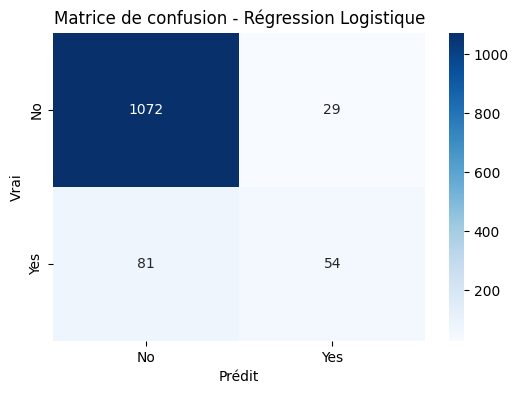

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matrice de confusion - Régression Logistique')
plt.ylabel('Vrai')
plt.xlabel('Prédit')
plt.show()

# **Arbre de Décision**
# *Entraînement*

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_final, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# **Prédiction**

In [ ]:
y_pred_dt = dt.predict(X_test_final)

# **Métriques**

In [ ]:
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Arbre de Décision - Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")

Arbre de Décision - Recall: 0.5111, F1-score: 0.5433


# **Random Forest**
# **Entraînement**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

# **Prédiction**

In [ ]:
y_pred_rf = rf.predict(X_test_final)

# **Métriques**

In [ ]:
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")

Random Forest - Recall: 0.3185, F1-score: 0.4195


# **Importance des features**

Top 10 des features les plus importantes:
             Feature  Importance
1           duration    0.269508
7          euribor3m    0.106901
0                age    0.078773
8        nr.employed    0.062703
6      cons.conf.idx    0.039336
2           campaign    0.038062
5     cons.price.idx    0.035044
4       emp.var.rate    0.030951
9   contacted_before    0.027887
48  poutcome_success    0.022816

Top 3 features: ['duration', 'euribor3m', 'age']


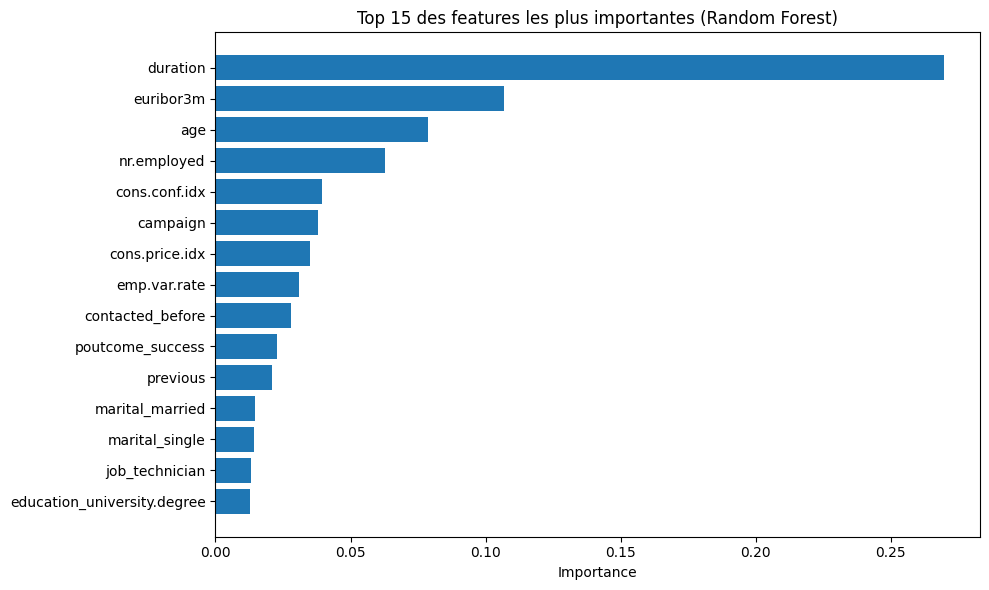

In [ ]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("Top 10 des features les plus importantes:")
print(feature_importance_df.head(10))

# Top 3
top_3 = feature_importance_df.head(3)['Feature'].tolist()
print(f"\nTop 3 features: {top_3}")

# Visualisation
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'].head(15)[::-1],
         feature_importance_df['Importance'].head(15)[::-1])
plt.xlabel('Importance')
plt.title('Top 15 des features les plus importantes (Random Forest)')
plt.tight_layout()
plt.show()

# **Comparaison finale et conclusion**
# **Tableau final**

In [ ]:
# Calcul de l'accuracy pour information
acc_base = accuracy_score(y_test, y_pred_baseline)
acc_log = accuracy_score(y_test, y_pred_log)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

results = pd.DataFrame({
    'Modèle': ['Baseline', 'Régression Logistique', 'Arbre de Décision', 'Random Forest'],
    'Accuracy': [acc_base, acc_log, acc_dt, acc_rf],
    'Recall': [recall_base, recall_log, recall_dt, recall_rf],
    'F1-score': [f1_base, f1_log, f1_dt, f1_rf]
})

print("Tableau de comparaison des modèles:")
print(results.to_string(index=False))

Tableau de comparaison des modèles:
               Modèle  Accuracy   Recall  F1-score
             Baseline  0.890777 0.000000  0.000000
Régression Logistique  0.911003 0.400000  0.495413
    Arbre de Décision  0.906149 0.511111  0.543307
        Random Forest  0.903722 0.318519  0.419512
